# Часть 1

## Этап 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('uplift_fp_data.csv')
    print("Датасет успешно загружен.")
except FileNotFoundError:
    print("Ошибка: файл 'uplift_fp_data.csv' не найден.")
    exit()
except Exception as e:
    print(f"Ошибка при загрузке датасета: {e}")
    exit()

Датасет успешно загружен.


In [2]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  int64  
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  int64  
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  int64  
 8   treatment        64000 non-null  int64  
 9   target           64000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.9 MB


In [3]:
print("Проверка на наличие пропусков:")
print(df.isnull().sum()) 

Проверка на наличие пропусков:
recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
treatment          0
target             0
dtype: int64


пропусков нет

- recency — количество месяцев с момента последней покупки. Этот атрибут помогает понять, как долго клиент не совершал покупок (индикатором его вовлечённости).
- history_segment — категоризация расходов клиента за последний год. Этот атрибут позволяет сегментировать клиентов по уровню их трат (помощь в таргетировании предложений).
- history — фактическая сумма (в $), потраченная клиентом за последний год. Этот атрибут предоставляет информацию о финансовом поведении клиента.
- mens — индикатор (1/0), где 1 означает, что клиент покупал товары для мужчин в течение последнего года. Это помогает определить предпочтения клиента.
- womens — индикатор (1/0), где 1 означает, что клиент покупал товары для женщин в течение последнего года. Это также помогает определить предпочтения клиента.
- zip_code — классификация почтового индекса (город, пригород, село). Этот атрибут может быть полезен для географического анализа клиентов.
- newbie — индикатор (1/0), где 1 обозначает нового клиента (в течение последних двенадцати месяцев). Это поможет оценить эффективность маркетинговых стратегий для привлечения новых клиентов.
- channel — описание каналов, через которые клиент совершал покупки в течение последнего года. Этот атрибут поможет с анализом предпочтений клиентов по каналам продаж (0 — мультиканал, 1 — мобильный, 2 — веб).
- treatment — индикатор (1/0), где 1 означает, что клиент получил промокод. Этот атрибут позволяет оценить влияние предложения на поведение клиента и его решение о покупке.
- target — индикатор (1/0), где 1 означает, что клиент успешно использовал промокод.

## Этап 2

### EDA


Проанализировать датасет:
- проверьте сбалансированность выборки, оценив распределение целевой переменной между контрольной и тестовой группами;
- используйте графики (например, barplot из библиотеки seaborn), чтобы визуально представить количество наблюдений в каждой группе.

Распределение целевой переменной (target):
 target
0    85.321875
1    14.678125
Name: proportion, dtype: float64
Распределение target по treatment:
 treatment  target
0          0         85.553704
           1         14.446296
1          0         84.859962
           1         15.140038
Name: proportion, dtype: float64


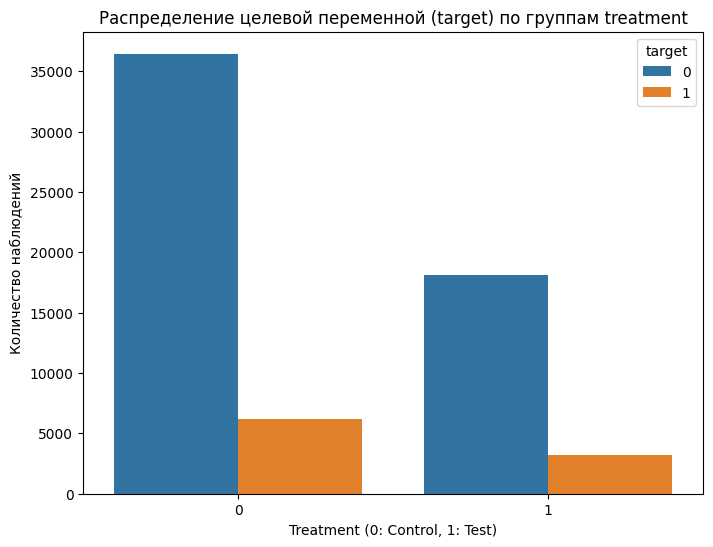

In [4]:
# Проверка сбалансированности целевой переменной (target)
print("Распределение целевой переменной (target):\n", df['target'].value_counts(normalize=True) * 100)

# Распределение целевой переменной между контрольной и тестовой группами (treatment)
print("Распределение target по treatment:\n", df.groupby('treatment')['target'].value_counts(normalize=True) * 100)

# Визуализация распределения target в зависимости от treatment
plt.figure(figsize=(8, 6))  
sns.countplot(x='treatment', hue='target', data=df) 
plt.title('Распределение целевой переменной (target) по группам treatment') 
plt.xlabel('Treatment (0: Control, 1: Test)') 
plt.ylabel('Количество наблюдений') 
plt.show()

# Этап 2

### Проверка на статистическую значимость

Провести проверку на статистическую значимость между контрольной и тестовой группами. Для этого используйте подходящие статистические тесты (например, t-тест или тест Манна-Уитни, в зависимости от распределения данных). Убедитесь, что данные соответствуют предпосылкам выбранного теста:
- сначала разделите данные на две группы, контрольную и тестовую, основываясь на наличии воздействия;
- проведите анализ, чтобы определить средние значения и стандартные отклонения для каждой группы;
- обоснуйте выбор статистического теста;
- примените выбранный статистический тест, чтобы оценить, есть ли значимые различия между группами;
- обратите внимание на значение p-value: если оно меньше 0.05, это указывает на статистически значимые различия между группами.

In [5]:
from scipy import stats

# Разделение данных на контрольную и тестовую группы
control_group = df[df['treatment'] == 0]
test_group = df[df['treatment'] == 1]

# Анализ средних значений и стандартных отклонений
print("Контрольная группа:")
print(control_group.describe())

print("Тестовая группа:")
print(test_group.describe())

# Вычисляем средние значения и стандартные отклонения целевой переменной
control_mean = control_group['target'].mean()
control_std = control_group['target'].std()
test_mean = test_group['target'].mean()
test_std = test_group['target'].std()

print(f"Контрольная группа - Среднее значение target: {control_mean:.4f}, Стандартное отклонение: {control_std:.4f}")
print(f"Тестовая группа - Среднее значение target: {test_mean:.4f}, Стандартное отклонение: {test_std:.4f}")

Контрольная группа:
            recency  history_segment       history          mens  \
count  42613.000000     42613.000000  42613.000000  42613.000000   
mean       5.761669         1.479924    241.859315      0.552085   
std        3.505422         1.547430    256.574723      0.497286   
min        1.000000         0.000000     29.990000      0.000000   
25%        2.000000         0.000000     64.500000      0.000000   
50%        6.000000         1.000000    157.000000      1.000000   
75%        9.000000         2.000000    325.210000      1.000000   
max       12.000000         6.000000   3345.930000      1.000000   

             womens      zip_code        newbie       channel  treatment  \
count  42613.000000  42613.000000  42613.000000  42613.000000    42613.0   
mean       0.549527      0.748363      0.501748      1.321029        0.0   
std        0.497547      0.698470      0.500003      0.679146        0.0   
min        0.000000      0.000000      0.000000      0.000000  

In [6]:
# Применение выбранного статистического теста (Манна-Уитни)
# Проверка на равенство дисперсий
# Если дисперсии значительно отличаются, можно использовать Welch's t-test, который не предполагает равенства дисперсий.
levene_test = stats.levene(control_group['target'], test_group['target'])
print(f"Levene test for equality of variances: statistic={levene_test.statistic:.4f}, p-value={levene_test.pvalue:.4f}")

# Проводим тест Манна-Уитни
# two-sided - двусторонний тест, проверяем различие в любую сторону
mann_whitney_u_test = stats.mannwhitneyu(control_group['target'], test_group['target'], alternative='two-sided') 

print(f"Mann-Whitney U test: statistic={mann_whitney_u_test.statistic:.4f}, p-value={mann_whitney_u_test.pvalue:.4f}")

# Интерпретация результатов
alpha = 0.05 

if mann_whitney_u_test.pvalue < alpha:
    print("Существует статистически значимая разница между контрольной и тестовой группами.")
else:
    print("Не обнаружено статистически значимой разницы между контрольной и тестовой группами.")

Levene test for equality of variances: statistic=5.4727, p-value=0.0193
Mann-Whitney U test: statistic=452520854.5000, p-value=0.0193
Существует статистически значимая разница между контрольной и тестовой группами.



Обоснование выбора статистического теста

- Цель: Сравнить средние значения бинарной переменной target (0/1) в двух независимых группах.
- Выбор теста: Тест Манна-Уитни.
- Обоснование выбора:
    - Непараметрический тест, не требует нормального распределения данных.
    - Более устойчив к ненормальности данных, чем t-тест Стьюдента.
    - Подходит, так как распределение target неизвестно, и выборки могут быть небольшими.

## Построение корреляций

Проанализировать взаимодействие признаков и целевой переменной, используя статистические методы и визуализацию. Для этого необходимо:
- Использовать метод corr() для корреляционного анализа, чтобы определить степень взаимосвязи между признаками и целевой переменной. Это можно сделать с помощью метода heatmap() из библиотеки seaborn для визуализации корреляционной матрицы.
- Сделать выводы о том, какие признаки имеют наибольшее влияние между собой

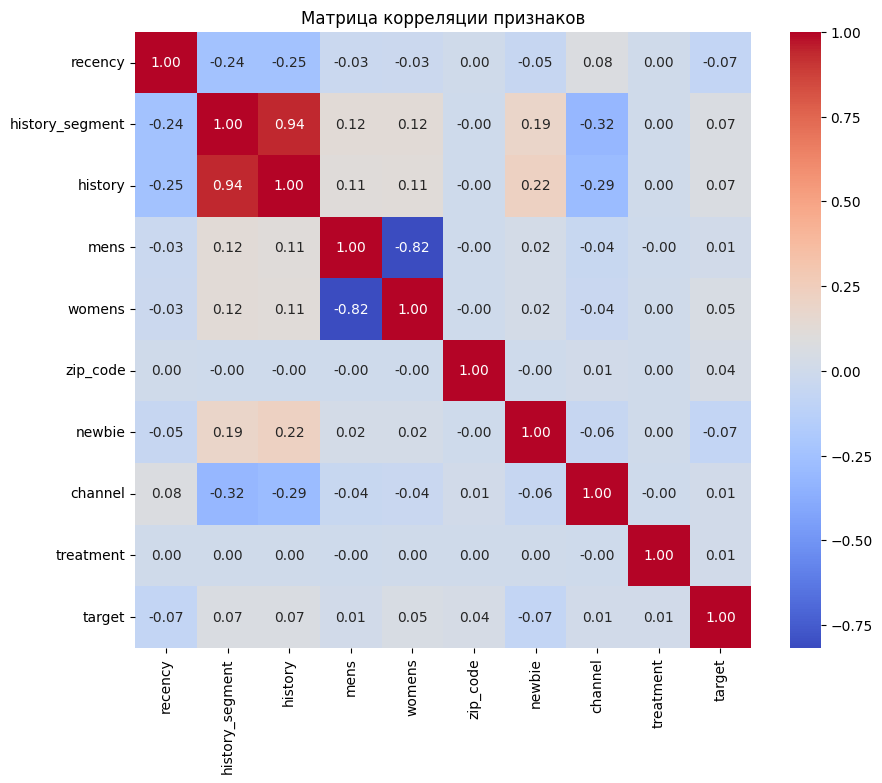

In [7]:
# Корреляционный анализ
correlation_matrix = df.corr()

# Визуализация корреляционной матрицы с помощью heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True) 
plt.title("Матрица корреляции признаков")
plt.show()

In [8]:
# Анализ влияния признаков (выводы)

# Анализ корреляции с целевой переменной (target)
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("Корреляция с целевой переменной (target):")
print(target_correlations)

Корреляция с целевой переменной (target):
target             1.000000
history_segment    0.069734
history            0.065153
womens             0.051999
zip_code           0.037570
channel            0.010584
treatment          0.009247
mens               0.006712
newbie            -0.073924
recency           -0.074765
Name: target, dtype: float64


In [9]:
# Анализ корреляции между признаками 
print("Анализ взаимодействия признаков:")
# Выбираем признаки с наибольшей корреляцией (по модулю) между собой, чтобы понять их взаимосвязи.  
# Например, можно выбрать пары с корреляцией > |0.5|
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5: 
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Признаки с высокой корреляцией (по модулю > 0.5):")
    for pair in high_corr_pairs:
        print(f"- {pair[0]} и {pair[1]}: {pair [2] :.2f}")
else:
    print("Не обнаружено признаков с высокой корреляцией.")

Анализ взаимодействия признаков:
Признаки с высокой корреляцией (по модулю > 0.5):
- history_segment и history: 0.94
- mens и womens: -0.82


Влияние признаков на использование промокода (target):

- Отрицательное влияние:
  - recency (-0.075): Чем дольше клиент не совершал покупок, тем менее вероятно использование промокода.
  - newbie (-0.074): Новые клиенты несколько менее склонны использовать промокод.

- Положительное влияние:
  - history_segment (0.070): Клиенты с более высокими сегментами истории расходов немного более склонны к использованию.
  - history (0.065): Чем больше потрачено за год, тем немного выше вероятность использования.
  - womens (0.052): Покупатели женских товаров немного более склонны использовать промокод.

- Очень слабое влияние (практически отсутствует):
  - zip_code (0.038)
  - channel (0.011)
  - treatment (0.009) - Получение промокода почти не связано с его использованием.
  - mens (0.007)

Основные выводы:
1. recency и newbie - наиболее важные факторы, отрицательно влияющие на использование промокода. Следует уделить внимание реактивации "спящих" клиентов и адаптации предложений для новичков.
2. history и history_segment также важны, но оказывают положительное влияние. Поддерживайте лояльность клиентов с хорошей историей покупок.
3. treatment (наличие промокода) имеет очень слабую корреляцию. Это может указывать на необходимость пересмотра стратегии промокодов:
  - Возможно, промокоды нерелевантны для целевой аудитории.
  - Возможно, промокоды недостаточно привлекательны.
  - Возможно, промокоды сложно использовать.
4. Остальные признаки (zip_code, channel, mens, womens) оказывают минимальное влияние на использование промокода.

Взаимодействие признаков:

Признаки с высокой корреляцией (по модулю > 0.5):
- history_segment и history: 0.94

## Этап 3

Uplift-деревья подходят, потому что:

- Цель совпадает: Ищут причинно-следственную связь между промокодом и его использованием, а не просто корреляцию.
- treatment с низкой корреляцией - это ок: Указывает на необходимость uplift-модели, чтобы найти тех, на кого промокод действительно влияет.
- Работают с данными: Подходят для разных типов признаков (числовые, категориальные).
- Интерпретируемы: Позволяют понять, какие группы клиентов лучше реагируют на промокод.
- Помогают оптимизировать затраты: Дают возможность таргетировать промокоды на самых восприимчивых клиентов.

### Советы по обучению и инференсу моделей
1. Некоторые uplift модели из библиотеки `causalml` будут требовать категориальные значения воздействия. Для этого используйте маппинг
#### Пример использования маппинга
```python
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}
treatment_train_mapped = treatment_train.map(treatment_mapping)
treatment_test_mapped = treatment_test.map(treatment_mapping)
```

2. При вызове метода `.predict` и получения метрик для тестовой выборки не забывайте применять к прогнозам метод `squeeze()`, чтобы преобразовать многомерный массив в одномерный, что поможет получить адекватные метрики.

3. Для воспроизводимости результатов и объективной оценки не забывайте применять `random_state=42` для моделей, а также при разделении выборки

### Разбиение выборки на тренировочную и тестовую

In [10]:
from sklearn.model_selection import train_test_split

# Выделение признаков, таргета и воздействия
X = df.drop(columns=['target', 'treatment'])
y = df['target']
treatment = df['treatment']

# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X, y, treatment, test_size=0.2, random_state=42, stratify=np.c_[treatment, y]
)

### Обучение выбранного бейзлайна

In [11]:
from causalml.inference.tree import UpliftRandomForestClassifier

# Создание маппинга
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}

# Применение маппинга к данным о воздействии
treatment_train_mapped = pd.Series(treatment_train).map(treatment_mapping)
treatment_test_mapped = pd.Series(treatment_test).map(treatment_mapping)

# Обучение UpliftRandomForestClassifier
uplift_model = UpliftRandomForestClassifier(
    control_name='control',
    n_estimators=100, 
    max_features=4, 
    random_state=42, 
    max_depth=5, 
    min_samples_leaf=100, 
    min_samples_treatment=10, 
    evaluationFunction='KL')

uplift_model.fit(X_train.values,
                 treatment_train_mapped.values,
                 y_train.values)


/home/mle-user/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Failed to import duecredit due to No module named 'duecredit'


### Расчет метрик для выбранного бейзлайна на тестовой выборке

In [12]:
from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score

# Получение предсказаний uplift на тестовой выборке
uplift = uplift_model.predict(X_test, full_output=False).squeeze()

# Метрики Uplift AUC, Qini AUC
uplift_auc = uplift_auc_score(y_true=y_test, 
                              uplift=uplift, 
                              treatment=treatment_test
                              )
qini_auc = qini_auc_score(y_true=y_test, 
                          uplift=uplift, 
                          treatment=treatment_test
                          )

uplift_30 = uplift_at_k(y_true=y_test, 
                        uplift=uplift, 
                        treatment=treatment_test, 
                        strategy='by_group', 
                        k=0.3)  

print(f"Uplift AUC: {uplift_auc:.4f}")
print(f"Qini AUC: {qini_auc:.4f}")
print(f"Uplift@30%: {uplift_30:.4f}")

Uplift AUC: 0.0271
Qini AUC: 0.0607
Uplift@30%: 0.0393


/tmp/ipykernel_104183/237999686.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


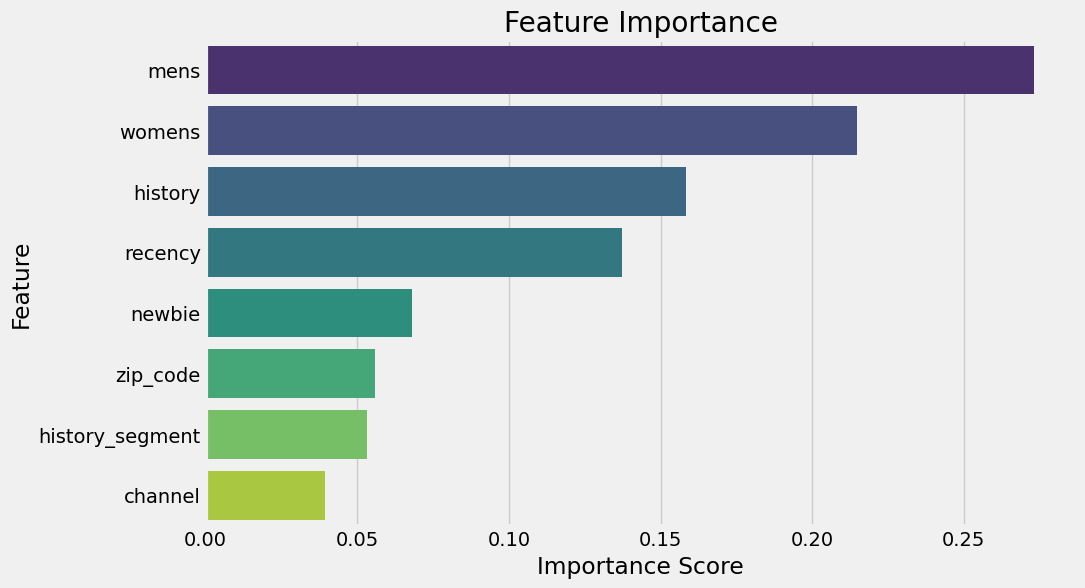

In [13]:
# Важность признаков
feature_importances = uplift_model.feature_importances_
feature_names = X.columns 

# Создаем DataFrame для удобства визуализации
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [14]:
top_percent = 0.05
top_5_percent = np.sort(uplift)[::-1][:int(len(uplift) * top_percent)]

print(f"Количество клиентов в верхних 5%: {len(top_5_percent)}")
print(f"Минимальное значение uplift в верхних 5%: {np.min(top_5_percent):.2f}")
print(f"Максимальное значение uplift в верхних 5%: {np.max(top_5_percent):.2f}")
print(f"Среднее значение uplift: {np.mean(top_5_percent):.2f}")

Количество клиентов в верхних 5%: 640
Минимальное значение uplift в верхних 5%: 0.05
Максимальное значение uplift в верхних 5%: 0.07
Среднее значение uplift: 0.06


ИТОГО: 
- Модель UpliftRandomForestClassifier показывает очень плохие результаты:
    - Uplift AUC: 0.0271 
    - Qini AUC: 0.0607 
    - Uplift@30%: 0.0393

- Слабая модель: Общая эффективность модели низкая, она слабо предсказывает uplift-эффект.
- Низкий Uplift AUC: Модель практически не различает пользователей, которые хорошо отреагируют на промокод, от тех, кто нет.
- Низкий Qini AUC: Модель плохо определяет перспективных пользователей для максимизации прироста заказов.
- Небольшой Uplift@30%: Нацеливаясь на 30% пользователей, получим увеличение конверсии на 3.93%. 
- Требуются улучшения: Необходимо доработать модель, иначе она бесполезна.

# Обучение 2 моделей 

### Обучение модели 1 -- T-Learner

In [15]:
from sklearn.ensemble import RandomForestClassifier
from causalml.inference.meta import BaseTClassifier
from sklift.metrics import uplift_auc_score, qini_auc_score

# Выделение признаков, таргета и воздействия
X = df.drop(columns=['target', 'treatment'])
y = df['target']
treatment = df['treatment']

# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X, y, treatment, test_size=0.2, random_state=42, stratify=np.c_[treatment, y]
)

# Создание маппинга
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}

# Применение маппинга к данным о воздействии
treatment_train_mapped = pd.Series(treatment_train).map(treatment_mapping) #убедитесь, что treatment_train - pandas Series

# создаём базовые модели для тестовой и контрольной групп
treatment_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    max_features="sqrt", 
    max_depth=4, 
    max_leaf_nodes=6,
    verbose=1
)

control_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    max_features="sqrt", 
    max_depth=4, 
    max_leaf_nodes=6,
    verbose=1
)

# инициализируем T-learner
t_learner = BaseTClassifier(
    treatment_learner=treatment_model,
    control_learner=control_model,
    control_name=0, 
)

# обучаем T-learner
t_learner.fit(
    X=X_train.values,  
    treatment=treatment_train.values,
    y=y_train.values 
)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


### Получение метрик по модели 1

In [16]:
# получаем предсказания для тестовой выборки
uplift_pred_t = t_learner.predict(X_test)

# рассчитываем метрики uplift
uplift_score_t = uplift_auc_score(
    y_test.values,
    uplift_pred_t.squeeze(),
    treatment_test.values
)

qini_score_t = qini_auc_score(
    y_test.values,
    uplift_pred_t.squeeze(),
    treatment_test.values
)

uplift_at_30_t = uplift_at_k(
    y_test.values,
    uplift_pred_t.squeeze(),
    treatment_test.values,
    strategy='by_group', 
    k=0.3
)

print(f"Uplift AUC: {uplift_score_t:.4f}")
print(f"Qini AUC: {qini_score_t:.4f}")
print(f"Uplift@30%: {uplift_at_30_t:.4f}")

Uplift AUC: 0.0242
Qini AUC: 0.0536
Uplift@30%: 0.0365


/home/mle-user/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/home/mle-user/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### Обучение модели 2 - X-Learner

In [17]:
from xgboost import XGBClassifier

# Выделение признаков, таргета и воздействия
X = df.drop(columns=['target', 'treatment'])
y = df['target']
treatment = df['treatment']

# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X, y, treatment, test_size=0.2, random_state=42, stratify=np.c_[treatment, y]
)

# Создание маппинга
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}

# Применение маппинга к данным о воздействии
treatment_train_mapped = pd.Series(treatment_train).map(treatment_mapping)

propensity_model = XGBClassifier(
    n_estimators=100, 
    max_features=4, 
    random_state=42, 
    max_depth=5, 
    min_samples_leaf=100, 
    min_samples_treatment=10, 
    evaluationFunction='KL')

# обучение propensity-модели на обучающей выборке
propensity_model.fit(X_train.values, y_train)

# получаем propensity score для train и test
p_train = propensity_model.predict_proba(X_train.values)[:, 1]
p_test = propensity_model.predict_proba(X_test.values)[:, 1]

print('Среднее значение propensity score для обучающей выборки', round(p_train.mean(), 3))
print('Среднее значение propensity score для тестовой выборки', round(p_test.mean(), 3))

Среднее значение propensity score для обучающей выборки 0.147
Среднее значение propensity score для тестовой выборки 0.146


/home/mle-user/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:24:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "evaluationFunction", "max_features", "min_samples_leaf", "min_samples_treatment" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [18]:
from causalml.inference.meta import BaseXClassifier
from xgboost import XGBClassifier, XGBRegressor

xgb_clf = XGBClassifier(
    n_estimators=100, 
    max_features=4, 
    random_state=42, 
    max_depth=5, 
    min_samples_leaf=100, 
    min_samples_treatment=10, 
    evaluationFunction='KL')

xgb_reg = XGBRegressor(
    n_estimators=100, 
    max_features=4, 
    random_state=42, 
    max_depth=5, 
    min_samples_leaf=100, 
    min_samples_treatment=10, 
    evaluationFunction='KL')

x_learner = BaseXClassifier(
    outcome_learner=xgb_clf,
    control_name=0,
    effect_learner=xgb_reg,
)

# обучаем X-learner с передачей propensity score
x_learner.fit(
    X=X_train.values,
    treatment=treatment_train.values,
    y=y_train.values,
    p=p_train,
)

/home/mle-user/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [17:24:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "evaluationFunction", "max_features", "min_samples_leaf", "min_samples_treatment" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Получение метрик по модели 2

In [19]:
from sklift.metrics import uplift_auc_score, qini_auc_score

# получаем uplift-предсказания для тестовой выборки, также передаём propensity score
uplift_pred_x = x_learner.predict(
    X_test.values,
    treatment=treatment_test.values,
    p=p_test
)

# оценка метрик uplift
uplift_score_x = uplift_auc_score(
    y_test.values,
    uplift_pred_x.squeeze(), 
    treatment_test.values
)
qini_score_x = qini_auc_score(
    y_test.values,
    uplift_pred_x.squeeze(), 
    treatment_test.values
)

uplift_30_x = uplift_at_k(
    y_test.values,
    uplift_pred_x.squeeze(),
    treatment_test.values,
    strategy='by_group', 
    k=0.3
)

print(f"Uplift AUC: {uplift_score_x:.4f}")
print(f"Qini AUC: {qini_score_x:.4f}")
print(f"Uplift@30%: {uplift_30_x:.4f}")


Uplift AUC: 0.0121
Qini AUC: 0.0273
Uplift@30%: 0.0260


### Обучение модели 3 - S-Learner

In [20]:
from sklearn.ensemble import RandomForestClassifier
from causalml.inference.meta import BaseSClassifier
from sklift.metrics import uplift_auc_score, qini_auc_score

learner = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    max_features="sqrt", 
    max_depth=4, 
    max_leaf_nodes=6,
    verbose=1
)

# инициализируем S-learner с базовой моделью случайного леса
s_learner = BaseSClassifier(
    learner=learner,
    control_name = 0,
)

# обучаем S-learner
s_learner.fit(X_train.values, treatment=treatment_train.values, y=y_train.values)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.6s finished


### Получение метрик по модели 3

In [21]:
uplift_vals_s = s_learner.predict(X_test)

# теперь можно оценить качество модели с помощью uplift-метрик
# Оценка метрик uplift
uplift_score_s = uplift_auc_score(
    y_test.values,
    uplift_vals_s.squeeze(), 
    treatment_test.values,
)
qini_score_s = qini_auc_score(
    y_test.values,
    uplift_vals_s.squeeze(), 
    treatment_test.values,
)

uplift_at_30_s = uplift_at_k(
    y_test.values,
    uplift_vals_s.squeeze(),
    treatment_test.values,
    strategy='by_group', 
    k=0.3
)

print(f"Uplift AUC: {uplift_score_s:.4f}")
print(f"Qini AUC: {qini_score_s:.4f}")
print(f"Uplift@30%: {uplift_at_30_s:.4f}")

Uplift AUC: 0.0139
Qini AUC: 0.0313
Uplift@30%: 0.0342


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Итоговые метрики:

- UpliftRandomForestClassifier: 
  - Uplift AUC: 0.0271
  - Qini AUC: 0.0607
  - Uplift@30%: 0.0393

- T-Learner
  - Uplift AUC: 0.0242
  - Qini AUC: 0.0536
  - Uplift@30%: 0.0365

- X-Learner
  - Uplift AUC: 0.0121
  - Qini AUC: 0.0273
  - Uplift@30%: 0.0260

- S-Learner
  - Uplift AUC: 0.0139
  - Qini AUC: 0.0313
  - Uplift@30%: 0.0342

ИТОГО: 
Сравнение моделей в порядке убывания эффективности:

1. UpliftRandomForestClassifier: Лучшие результаты по всем метрикам.
2. T-Learner: Вторая по эффективности. Результаты немного ниже, чем у UpliftRandomForestClassifier, но все же лучше, чем у X-Learner и S-Learner.
3. S-Learner: Третья по эффективности, незначительно превосходит X-Learner по Uplift@30%, но имеет немного лучшие значения Qini AUC.
4. X-Learner: Наименее эффективная модель по всем метрикам.

Выводы:

- UpliftRandomForestClassifier - лучший выбор: Эта модель показывает наилучшие результаты и должна быть использована для определения целевой аудитории для промокода.
- Невысокие значения метрик: все значения Uplift AUC, Qini AUC и Uplift@30% довольно низкие. Модели не очень хорошо различают пользователей, на которых промокод повлияет положительно. Возможно, стоит:
  - Улучшить качество данных: добавить новые признаки, которые могут быть полезны для прогнозирования uplift'а
  - Подобрать параметры модели: Попробовать разные параметры моделей и провести более тщательную валидацию.
  - Рассмотреть другие модели

# Часть 2

## Этап 1
Улучшите бейзлайн выбранной модели

#### Генерация признаков (опционально)

In [22]:
from causalml.inference.tree import UpliftRandomForestClassifier

def feature_engineering(df):
    # Сумма покупок для мужчин и женщин
    df['gender_affinity'] = df['mens'] + df['womens']

    # Взаимодействие истории покупок и сегмента
    df['history_x_segment'] = df['history'] * df['history_segment']

    # Отношение давности к истории покупок (если история покупок > 0, иначе 0)
    df['recency_to_history'] = df.apply(lambda row: row['recency'] / row['history'] if row['history'] > 0 else 0, axis=1)

    # Добавим бинарный признак: совершал ли клиент покупки и для мужчин, и для женщин?
    df['both_genders'] = ((df['mens'] == 1) & (df['womens'] == 1)).astype(int)

    # Добавим признак, учитывающий взаимодействие сегмента и канала
    df['segment_channel_interaction'] = df['history_segment'] * df['channel']
    
    return df

df = feature_engineering(df.copy()) 

# Выделение признаков, таргета и воздействия
X = df.drop(columns=['target', 'treatment'])
y = df['target']
treatment = df['treatment']

# Вывод информации о новых признаках
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   recency                      64000 non-null  int64  
 1   history_segment              64000 non-null  int64  
 2   history                      64000 non-null  float64
 3   mens                         64000 non-null  int64  
 4   womens                       64000 non-null  int64  
 5   zip_code                     64000 non-null  int64  
 6   newbie                       64000 non-null  int64  
 7   channel                      64000 non-null  int64  
 8   treatment                    64000 non-null  int64  
 9   target                       64000 non-null  int64  
 10  gender_affinity              64000 non-null  int64  
 11  history_x_segment            64000 non-null  float64
 12  recency_to_history           64000 non-null  float64
 13  both_genders    

Так же можно сгенерировать признаки автоматически при помощи SplineTransformer, QuantileTransformer, RobustScaler, PolynomialFeatures и/или KBinsDiscretizer и затем использовать ColumnTransformer, в данном случае ограничусь ручной генрацией признаков, так как это тоже дало улучшение метрик.

In [23]:
# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X, y, treatment, test_size=0.2, random_state=42, stratify=np.c_[treatment, y]
)

# Применение маппинга к данным о воздействии
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}
treatment_train_mapped = pd.Series(treatment_train).map(treatment_mapping)
treatment_test_mapped = pd.Series(treatment_test).map(treatment_mapping)

# Обучение UpliftRandomForestClassifier
uplift_model = UpliftRandomForestClassifier(
    control_name='control',
    n_estimators=100, 
    max_features=4,
    random_state=42, 
    max_depth=5, 
    min_samples_leaf=100, 
    min_samples_treatment=10,  
    evaluationFunction='KL')

uplift_model.fit(X_train.values,
                 treatment_train_mapped.values,
                 y_train.values)

In [24]:
# Получение предсказаний uplift на тестовой выборке
uplift_features = uplift_model.predict(X_test, full_output=False).squeeze()

# Метрики
uplift_auc_features = uplift_auc_score(y_true=y_test, 
                              uplift=uplift_features, 
                              treatment=treatment_test
                              )
qini_auc_features = qini_auc_score(y_true=y_test, 
                          uplift=uplift_features, 
                          treatment=treatment_test
                          )

uplift_30_features = uplift_at_k(y_true=y_test, 
                        uplift=uplift_features, 
                        treatment=treatment_test, 
                        strategy='by_group', 
                        k=0.3)  

print(f"Uplift AUC: {uplift_auc_features:.4f}")
print(f"Qini AUC: {qini_auc_features:.4f}")
print(f"Uplift@30%: {uplift_30_features:.4f}")

Uplift AUC: 0.0274
Qini AUC: 0.0612
Uplift@30%: 0.0440


### Подбор гиперпараметров

In [25]:
from causalml.inference.tree import UpliftRandomForestClassifier
import optuna
from optuna import create_study
from sklift.metrics import uplift_at_k

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 50, 150)
    max_features = trial.suggest_categorical('max_features', [2, 4, 6, 8, 10])
    min_samples_treatment = trial.suggest_int('min_samples_treatment', 5, 50)
    # Обучение UpliftRandomForestClassifier
    uplift_model = UpliftRandomForestClassifier(
        control_name='control',
        n_estimators=n_estimators, 
        max_features=max_features, 
        random_state=42, 
        max_depth=max_depth, 
        min_samples_leaf=min_samples_leaf, 
        min_samples_treatment=min_samples_treatment, 
        evaluationFunction='KL')

    uplift_model.fit(X_train.values,
                     treatment_train_mapped.values, 
                     y_train.values)
    # Получение предсказаний uplift на тестовой выборке
    uplift_pred = uplift_model.predict(X_test, full_output=False).squeeze()

    uplift_at_30 = uplift_at_k(y_test, uplift_pred, treatment_test, k=0.3, strategy='overall')
    return uplift_at_30

In [26]:
# Создаем и запускаем исследование
study = create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Выводим лучшие гиперпараметры
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)

[I 2025-08-14 17:24:58,425] A new study created in memory with name: no-name-ef15b73e-f52d-4ce4-a532-3ff5971a5cc4
[I 2025-08-14 17:25:30,425] Trial 0 finished with value: 0.05219078399876141 and parameters: {'n_estimators': 89, 'max_depth': 7, 'min_samples_leaf': 143, 'max_features': 8, 'min_samples_treatment': 13}. Best is trial 0 with value: 0.05219078399876141.
[I 2025-08-14 17:26:12,980] Trial 1 finished with value: 0.056151589996912624 and parameters: {'n_estimators': 187, 'max_depth': 7, 'min_samples_leaf': 76, 'max_features': 4, 'min_samples_treatment': 26}. Best is trial 1 with value: 0.056151589996912624.
[I 2025-08-14 17:28:55,044] Trial 2 finished with value: 0.05238510935115362 and parameters: {'n_estimators': 194, 'max_depth': 9, 'min_samples_leaf': 73, 'max_features': 10, 'min_samples_treatment': 10}. Best is trial 1 with value: 0.056151589996912624.
[I 2025-08-14 17:29:35,005] Trial 3 finished with value: 0.04007473499580569 and parameters: {'n_estimators': 190, 'max_dep

Best hyperparameters:  {'n_estimators': 118, 'max_depth': 9, 'min_samples_leaf': 105, 'max_features': 6, 'min_samples_treatment': 45}
Best score:  0.0580550145767537


In [27]:
# Обучение модели с лучшими параметрами
best_params = study.best_params
best_uplift_model = UpliftRandomForestClassifier(
    control_name='control',
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    random_state=42,
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_treatment = best_params['min_samples_treatment'],
    evaluationFunction='KL')

best_uplift_model.fit(X_train.values, treatment_train_mapped.values, y_train.values)

# Получение предсказаний uplift на тестовой выборке
best_uplift = best_uplift_model.predict(X_test, full_output=False).squeeze()

# Метрики
uplift_auc_best = uplift_auc_score(y_true=y_test, 
                              uplift=best_uplift, 
                              treatment=treatment_test
                              )
qini_auc_best = qini_auc_score(y_true=y_test, 
                          uplift=best_uplift, 
                          treatment=treatment_test
                          )

uplift_30_best = uplift_at_k(y_true=y_test, 
                        uplift=best_uplift, 
                        treatment=treatment_test, 
                        strategy='by_group', 
                        k=0.3)  

print(f"Uplift AUC: {uplift_auc_best:.4f}")
print(f"Qini AUC: {qini_auc_best:.4f}")
print(f"Uplift@30%: {uplift_30_best:.4f}")

Uplift AUC: 0.0308
Qini AUC: 0.0688
Uplift@30%: 0.0560


Итоги по улучшению модели (сгенерированы признаки + подобраны гиперпараметры):
- БЫЛО:
    - Uplift AUC: 0.0271
    - Qini AUC: 0.0607
    - Uplift@30%: 0.0393

- СТАЛО:
    - Uplift AUC: 0.0308
    - Qini AUC: 0.0688
    - Uplift@30%: 0.0560

Метрики улучшились, Uplift@30% достиг значения 0.0560 

## Этап 2

### Визуализация результатов

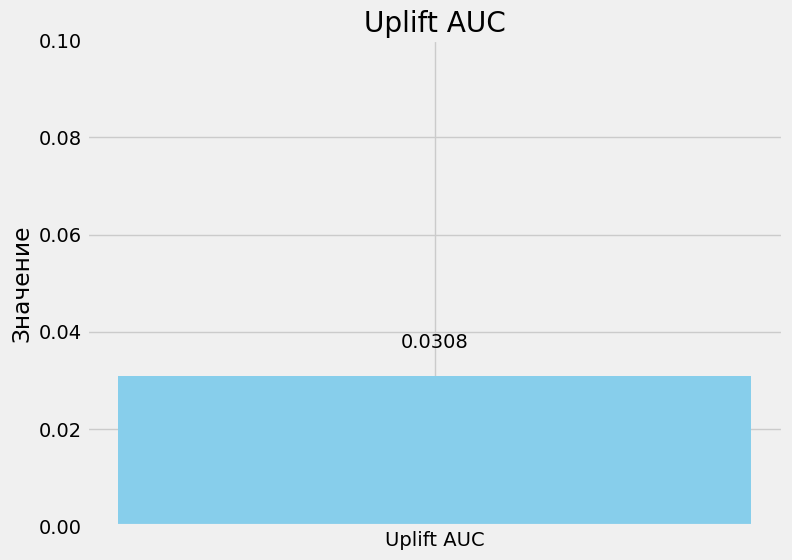

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# График Uplift AUC
def plot_uplift_auc(uplift_auc):
    plt.figure(figsize=(8, 6))
    plt.bar(['Uplift AUC'], [uplift_auc], color='skyblue')
    plt.ylim(0, 0.1)
    plt.text(0, uplift_auc + 0.005, f'{uplift_auc:.4f}', ha='center', va='bottom')
    plt.ylabel('Значение')
    plt.title('Uplift AUC')
    plt.show()

plot_uplift_auc(uplift_auc_best)

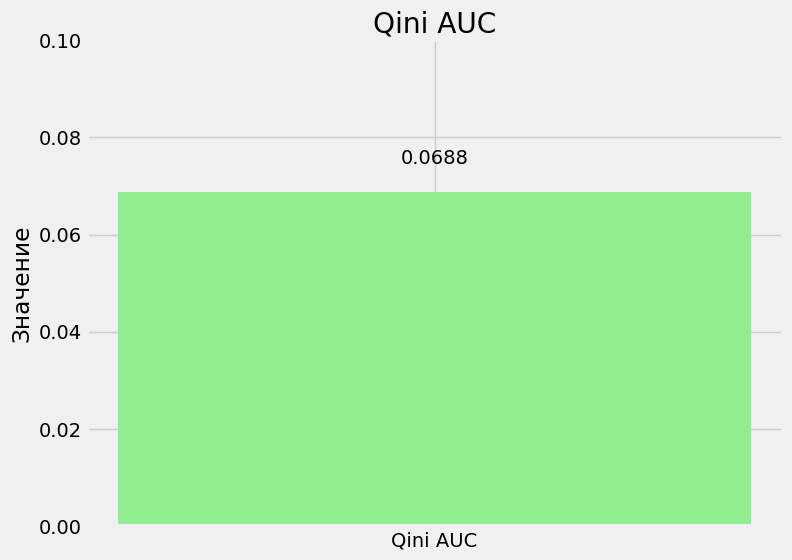

In [29]:
# График Qini AUC
def plot_qini_auc(qini_auc):
    plt.figure(figsize=(8, 6))
    plt.bar(['Qini AUC'], [qini_auc], color='lightgreen')
    plt.ylim(0, 0.1)  
    plt.text(0, qini_auc + 0.005, f'{qini_auc:.4f}', ha='center', va='bottom') 
    plt.ylabel('Значение')
    plt.title('Qini AUC')
    plt.show()

plot_qini_auc(qini_auc_best)

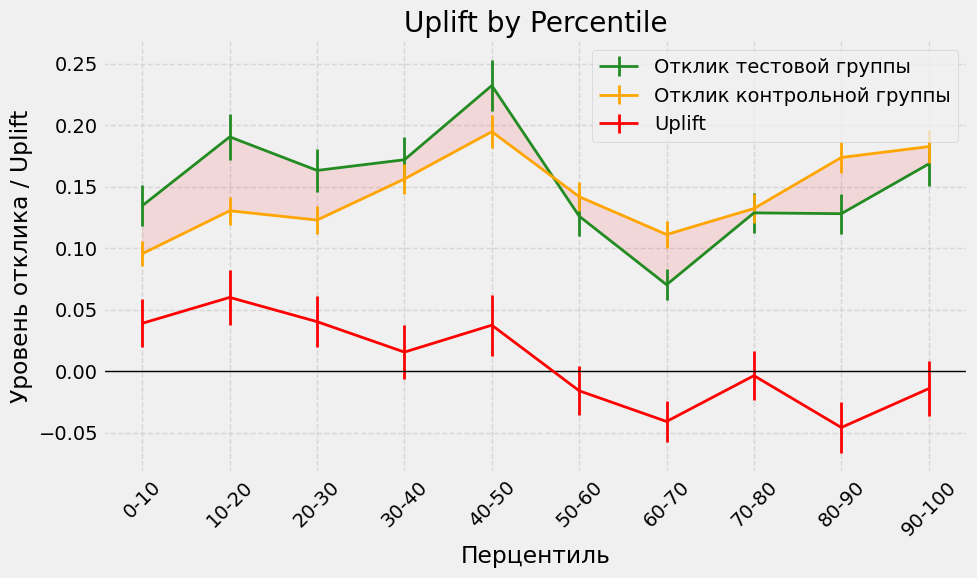

In [30]:
from utils import custom_uplift_by_percentile

# Визуализация Uplift по перцентилям
fig = custom_uplift_by_percentile(y_true=y_test,
                                  uplift=uplift_features,
                                  treatment=treatment_test,
                                  kind='line',
                                  bins=10,
                                  string_percentiles=True,
                                  figsize=(10, 6),
                                  title='Uplift by Percentile')
plt.show()

Интерпретация:

- Высокий Uplift в определенных перцентилях: Указывает на то, что промокод наиболее эффективно сработал для пользователей с определенной предсказанной вероятностью переключения. Судя по графику Uplift by Percentile, наиболее перспективной аудиторией для предложения промокода являются пользователи, попадающие в перцентили от 0 до 50. В этих перцентилях Uplift (разница между откликом тестовой и контрольной группы) положительный и наиболее высокий, что говорит о том, что промокод будет эффективен для этих пользователей.
- Отрицательный Uplift в определенных перцентилях: на нашем графике начиная с 50 перцентиля uplift падает ниже нуля. Может означать, что, возможно, этим пользователям больше подходят другие акции или стимулы.
- Общая картина Uplift: Позволяет оценить, насколько хорошо модель предсказывает реальное поведение пользователей, и насколько эффективна сама промо-акция. Если uplift в целом низкий, возможно, стоит пересмотреть целевую аудиторию или механику промокода.

Идеи по итогам: 

- Разработка новых акций: Для пользователей, где uplift низкий или отрицательный, можно разработать другие, более подходящие стимулы.
- Поработать над улучшением модели: Анализ uplift по перцентилям может помочь выявить недостатки модели и улучшить ее точность предсказания. Например, если модель переоценивает вероятность переключения для определенной группы пользователей (высокая предсказанная вероятность, но низкий реальный отклик), это может указывать на необходимость доработки алгоритма или включения новых факторов.
- Размер промокода: Размер промокода (500 рублей) может быть оптимальным для одних групп пользователей и недостаточным или избыточным для других. Возможно, стоит протестировать разные размеры промокодов для разных перцентилей.
- Стоимость привлечения: можно сравнить стоимость привлечения клиентов с помощью промокодов с другими маркетинговыми каналами. Возможно, есть более эффективные способы увеличения использования сервиса.


# Этап 3

In [31]:
import pandas as pd
import numpy as np

# Класс для инференса модели
class UpliftModelInference:
    """
    Класс для инференса uplift модели.
    """

    def __init__(self, model, feature_names, logger=None):
        """
        Инициализация класса.
        
        Аргументы:
            model: Обученная модель uplift
            feature_names: Список признаков для предсказания 
            logger: Объект для логирования (по умолчанию None)
        """
        self.model = model
        self.feature_names = feature_names
        self.logger = logger
        
        if self.logger:
            self.logger.info("Модель UpliftModel инициализирована с признаками: %s", feature_names)

    def _transform_data(self, X):
        """
        Преобразование данных для модели.
        
        Аргументы:
            X: pandas.DataFrame с признаками
        """
        if self.logger:
            self.logger.debug("Преобразование входных данных размерности %s", X.shape)

        # feature engineering
        X['gender_affinity'] = X['mens'] + X['womens']
        X['history_x_segment'] = X['history'] * X['history_segment']
        X['recency_to_history'] = X.apply(lambda row: row['recency'] / row['history'] if row['history'] > 0 else 0, axis=1)
        X['both_genders'] = ((X['mens'] == 1) & (X['womens'] == 1)).astype(int)
        X['segment_channel_interaction'] = X['history_segment'] * X['channel']

        return X
    
    def predict(self, X):
        """
        Получение предсказаний uplift.
        
        Аргументы:
            X: pandas.DataFrame с признаками
            
        Возвращает:
            numpy.array с предсказанными значениями uplift
        """
        # Проверяем, что датафрейм не пустой
        if X.empty:
            if self.logger:
                self.logger.error("Предоставлен пустой датафрейм")
            return None
            
        # Проверяем наличие пропущенных значений
        if X.isnull().any().any():
            if self.logger:
                self.logger.error("Входные данные содержат пропущенные значения")
            return [None]*len(X)
        
        if self.logger:
            self.logger.info("Выполняем предсказания для данных размерности %s", X.shape)

        # Преобразуем данные для модели
        if self.logger:
            self.logger.debug("Начинаем преобразование данных")
        X = self._transform_data(X)

        # Проверяем наличие всех необходимых признаков ПОСЛЕ преобразования
        missing_features = set(self.feature_names) - set(X.columns)
        if missing_features:
            error_msg = f"Отсутствуют признаки: {missing_features}"
            if self.logger:
                self.logger.error(error_msg)
            return [None]*len(X)
        
        # Вычисляем uplift
        if self.logger:
            self.logger.debug("Выполняем предсказания модели")

        # Получение предсказаний uplift
        try:
            uplift = self.model.predict(X)
        except Exception as e:
            if self.logger:
                self.logger.error(f"Ошибка во время предсказания: {e}")
            return [None]*len(X)
        
        if self.logger:
            self.logger.info("Предсказания успешно завершены")
            
        return uplift

In [32]:
feature_names = ['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code', 'newbie', 'channel',
                 'gender_affinity', 'history_x_segment', 'recency_to_history', 'both_genders', 'segment_channel_interaction']
model = UpliftModelInference(model=best_uplift_model, feature_names=feature_names)

In [33]:
test_data = pd.DataFrame({
            'recency': [1, 2, 3],
            'history_segment': [1, 2, 3], 
            'history': [100, 200, 300],
            'mens': [1, 0, 1],
            'womens': [0, 1, 0],
            'zip_code': [1, 0, 1],
            'newbie': [0, 1, 0],
            'channel': [1, 2, 0]
        })

In [34]:
# проверка работы класса
model.predict(test_data)

array([[-0.02387804],
       [-0.01477442],
       [-0.06288813]])